<a href="https://colab.research.google.com/github/rosenanna/Master_Thesis/blob/main/MelanomaData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 5.3 MB/s 


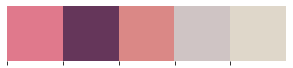

In [8]:
import pandas as pd 
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from matplotlib.patches import Rectangle
import pydicom as dcm
import seaborn as sns
%matplotlib inline 
import matplotlib.ticker as ticker


# Set Color Palettes for the notebook
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']
sns.palplot(sns.color_palette(colors_nude))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
sample_submission_df = pd.read_csv('/content/drive/MyDrive/thesis/ExJob Generative Modelling for Melanoma Detection/meta data/sample_submission.csv')
train_df = pd.read_csv('/content/drive/MyDrive/thesis/ExJob Generative Modelling for Melanoma Detection/meta data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/thesis/ExJob Generative Modelling for Melanoma Detection/meta data/test.csv')
sam_data = pd.read_excel('/content/drive/MyDrive/thesis/ExJob Generative Modelling for Melanoma Detection/meta data/Metadata_2022-01-26.xlsx')

In [44]:
print(f"sample submission shape: {sample_submission_df.shape}")
print(f"train shape: {train_df.shape}")
print(f"test shape: {test_df.shape}")
print(f"test shape: {sam_data.shape}")

# Change columns names
new_names = ['age',	'sex',	'benign_malignant',	'Lesion.id',	'filnamn',	'EXKL',	'anatomy',	'MM Exakt Breslow',	'MM Breslow']
# new_names = ['dcm_name', 'ID', 'sex', 'age', 'anatomy', 'diagnosis', 'benign_malignant', 'target']
sam_data.columns = new_names

sample submission shape: (10982, 2)
train shape: (33126, 8)
test shape: (10982, 5)
test shape: (1315, 9)


# Looking at the data


In [21]:
sam_data.head()

,age,sex,invasiv in.situ,Lesion.id,filnamn,EXKL,anatomy,MM Exakt Breslow,MM Breslow
0,57.0,M,in situ,1.0,0001_derm_01,NaN,5=Trunk,NaN,NaN
1,61.0,K,inv,3.0,0003_derm_01,NaN,6=Upper extremities,0.5,0.1-0.5
2,47.0,M,inv,4.0,0004_derm_01,NaN,5=Trunk,0.7,0.6-0.8
3,70.0,M,in situ,5.0,0005_derm_01,NaN,5=Trunk,NaN,NaN
4,91.0,M,inv,6.0,0006_derm_01,NaN,3=Face & neck,0.2,0.1-0.5


In [15]:
train_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


# Compare


In [12]:
tr_patient_id = train_df.patient_id.nunique()
te_patient_id = test_df.patient_id.nunique()
list_tr_patient_id = train_df.patient_id.unique()
list_te_patient_id = test_df.patient_id.unique()
intersection = set(list_tr_patient_id) & set(list_te_patient_id)
print(f"Unique patients in train: {tr_patient_id} and test: {te_patient_id}")
print(f"Patients in common in train and test: {len(intersection)}")



Unique patients in train: 2056 and test: 690
Patients in common in train and test: 0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

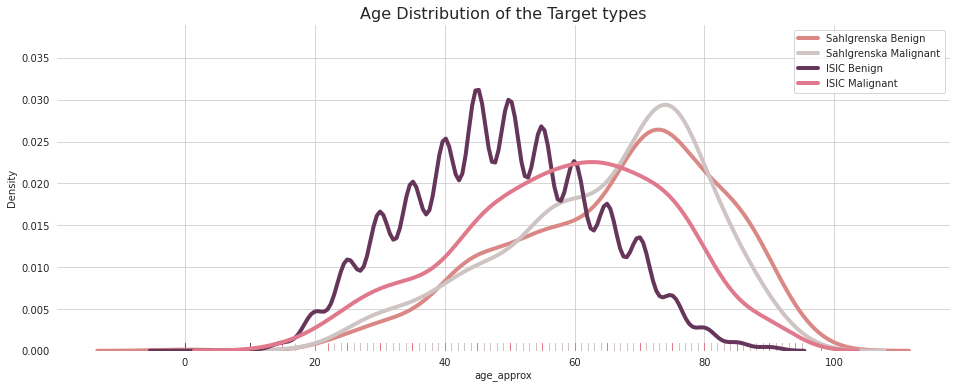

In [45]:
# Figure
f, (ax2) = plt.subplots(1, 1, figsize = (16, 6))

b = sns.distplot(a = sam_data[sam_data['benign_malignant']=='inv']['age'], ax=ax2, color=colors_nude[2], 
                 hist=False, rug=True, kde_kws=dict(linewidth=4), label='Sahlgrenska Benign')
c = sns.distplot(a = sam_data[sam_data['benign_malignant']=='in situ']['age'], ax=ax2, color=colors_nude[3], 
                 hist=False, rug=True, kde_kws=dict(linewidth=4), label='Sahlgrenska Malignant')
d = sns.distplot(a = train_df[train_df['benign_malignant']=='benign']['age_approx'], ax=ax2, color=colors_nude[1], 
                 hist=False, rug=True, kde_kws=dict(linewidth=4), label='ISIC Benign')
e = sns.distplot(a = train_df[train_df['benign_malignant']=='malignant']['age_approx'], ax=ax2, color=colors_nude[0], 
                 hist=False, rug=True, kde_kws=dict(linewidth=4), label='ISIC Malignant')


    
ax2.set_title('Age Distribution of the Target types', fontsize=16)
ax2.legend()
sns.despine(left=True, bottom=True);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


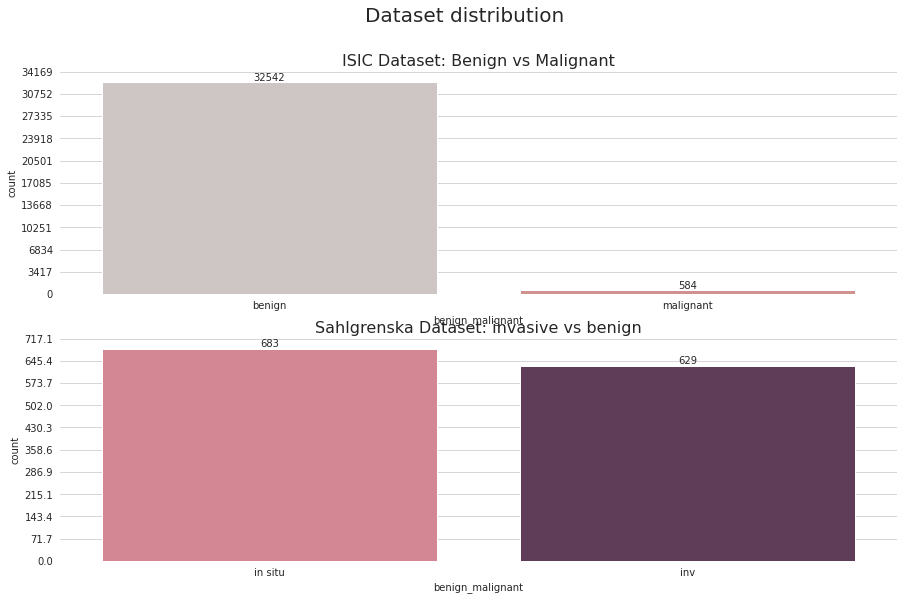

In [108]:
import matplotlib.ticker as ticker

# Data
nan_diag = train_df[train_df['benign_malignant'].isna() == True]
has_diag = train_df[train_df['benign_malignant'].isna() == False]
has_diag2 = sam_data[sam_data['benign_malignant'].isna() == False]

# Figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 9))
# f, (ax1) = plt.subplots(1, 1, figsize = (16, 6))

a = sns.countplot(has_diag['benign_malignant'], ax = ax1, palette=[colors_nude[3],colors_nude[2]])
b = sns.countplot(x=has_diag2['benign_malignant'], ax = ax2, palette=colors_nude)

ax2.set_title('Sahlgrenska Dataset: invasive vs benign', fontsize=16)
ax1.set_title('ISIC Dataset: Benign vs Malignant', fontsize=16)
# ax2.set_title('Anatomy for invasive', fontsize=16)

# a.set_xticklabels(a.get_xticklabels(), rotation=0, ha="right")
# b.set_xticklabels(b.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);



for p in ax1.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax1.annotate('{:1.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

for p in ax2.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax2.annotate('{:1.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax1.yaxis.set_major_locator(ticker.LinearLocator(11))
ax2.yaxis.set_major_locator(ticker.LinearLocator(11))

f.suptitle('Dataset distribution', fontsize=20)





plt.savefig('melanoma_count.jpg')